# notes:
---we try to overfit on small samples to : 1)make sure our implemetation is correct 2)find a proper range for hyper parameters and then limit it from each side based on the vl_acc->if one of best accuracies is in our specified range's margin, then we should expand it in that side




---loss function-> if our plot doesn't change at the beginning then probably our weights are too small 
secondly if the plot has rough wiggles then our batch size is too small


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import neural_net
from numpy.random import uniform as uniform
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

np.random.seed(1)
Xtr = 10 * np.random.randn(num_inputs, input_size)
ytr = np.array([0, 1, 2, 2, 1])

In [13]:
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
correct_loss = 1.30378789133

In [14]:
nn = neural_net.TwoLayerNet(input_size,hidden_size,num_classes,1e-1)

In [15]:
l,g1 = nn.compute_loss(Xtr,ytr,0.1,0)
l

1.3037878913298206

In [16]:
g2 = nn.compute_loss_analytic(Xtr,ytr,0.1,0.00001)

In [19]:
for p in g1:
    print(rel_error(g1[p],g2[p]))
#rel_error(g1['b2'],g2['b2'])

3.440707836450643e-09
3.5613181785044393e-09
4.402179838755205e-11
8.37252058841726e-10


In [23]:
nn = neural_net.TwoLayerNet(input_size,hidden_size,num_classes,1e-1)
stats = nn.train(Xtr,ytr,Xtr,ytr,lr=1e-1, landa=1e-5,
            num_iters=100)
stats['loss_hist'][-1]

99,loss:0.017150   tr:1.000000    vl:1.000000


0.017149607938732093

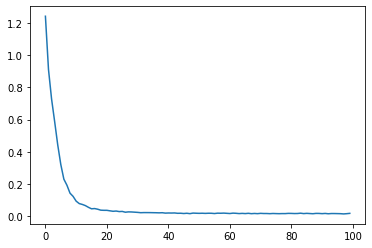

In [26]:
plt.plot(stats['loss_hist'])
plt.show()

In [27]:
import load_cifar
dataset_dir = 'F:\ML\Winter-2016-CS231N-master\Assignment1\cs231n\datasets\cifar-10-batches-py'

In [29]:
Xtr,ytr,Xte,yte = load_cifar.load(dataset_dir)

Xvl ,yvl = Xtr[49000:],ytr[49000:]
Xtr ,ytr = Xtr[:49000],ytr[:49000]
Xte, yte = Xte[:1000],yte[:1000]

print(Xtr.shape),
print(Xte.shape),
print(Xvl.shape)

mean_image = np.mean(Xtr,axis = 0)
Xte -= mean_image
Xtr -= mean_image
Xvl -= mean_image

Xtr = Xtr.reshape(49000,-1)
Xte = Xte.reshape(1000,-1)
Xvl = Xvl.reshape(1000,-1)

print(Xtr.shape),
print(Xte.shape),
print(Xvl.shape)

(49000, 32, 32, 3)
(1000, 32, 32, 3)
(1000, 32, 32, 3)
(49000, 3072)
(1000, 3072)
(1000, 3072)


99,loss:0.007150   tr:1.000000    vl:0.182000
199,loss:0.004220   tr:1.000000    vl:0.181000


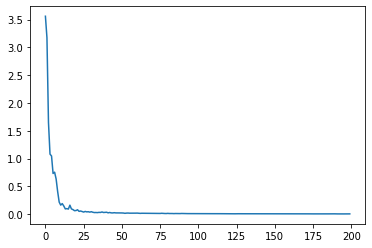

1.0

In [30]:
xdv,ydv = Xtr[:50],ytr[:50]  #4e-4 -> 1e-3  
nn2 = neural_net.TwoLayerNet(3072,75,10,1e-2)
stats = nn2.train(xdv, ydv, Xvl, yvl,
            num_iters=200, batch_size=50,
            lr=1e-3, lr_decay=1,  #landa==0
            landa=0)
plt.plot(stats['loss_hist'])
plt.show()
stats['tr_acc_hist'][-1]

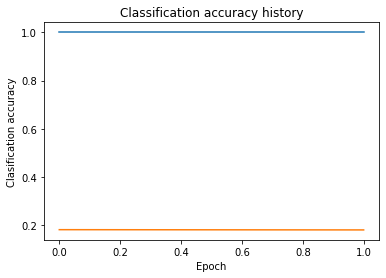

In [31]:
plt.plot(stats['tr_acc_hist'], label='train')
plt.plot(stats['vl_acc_hist'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [43]:
#lrs = [2.1e-3,3.2e-3,3.3e-3,3.4e-3,3.5e-3,3.6e-3,3.7e-3,3.8e-3,4.9e-3,3.1e-3]
c_lr = {}
lrs = []
regs = []
input_size = 3072
hidden_size = 75
num_classes = 10
num_inputs = 49000

In [127]:
nn = neural_net.TwoLayerNet(input_size,100,num_classes,1e-3)
stats = nn.train(Xtr, ytr, Xvl, yvl,
            num_iters=2000, batch_size=300,
            lr=3e-3, lr_decay=.90,
            landa=0)

163
0,loss:2.302369   tr:0.168245    vl:0.161000
163,loss:1.864294   tr:0.371082    vl:0.384000
326,loss:1.564676   tr:0.451204    vl:0.439000
489,loss:1.412357   tr:0.483102    vl:0.458000
652,loss:1.347789   tr:0.512980    vl:0.496000
815,loss:1.305834   tr:0.520245    vl:0.472000
978,loss:1.312344   tr:0.543673    vl:0.505000
1141,loss:1.250735   tr:0.562510    vl:0.497000
1304,loss:1.202572   tr:0.561735    vl:0.493000
1467,loss:1.046730   tr:0.582918    vl:0.523000
1630,loss:1.152920   tr:0.600204    vl:0.524000
1793,loss:1.268072   tr:0.606000    vl:0.532000
1956,loss:1.098496   tr:0.616184    vl:0.528000


In [128]:
stats['loss_hist'][-1]

1.1893190406932572

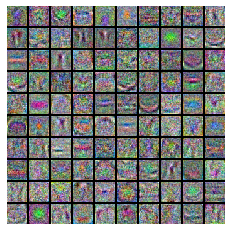

In [123]:
from vis_utils import visualize_grid



def show_net_weights(nn):
  W1 = nn.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(nn)

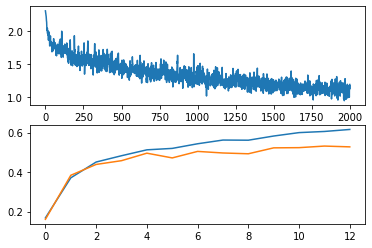

In [129]:
plt.subplot(2,1,1)
plt.plot(stats['loss_hist'])
plt.subplot(2,1,2)
plt.plot(stats['tr_acc_hist'])
plt.plot(stats['vl_acc_hist'])
plt.show()

In [130]:
y_p = nn.predict(Xte)
(y_p == yte).mean()

0.517